In [53]:
import pandas as pd 
from category_encoders import TargetEncoder

In [54]:
train_df = pd.read_csv(r"C:\Users\hites\OneDrive\Desktop\Housing Regression\data\processed\cleaned_train.csv")
eval_df = pd.read_csv(r"C:\Users\hites\OneDrive\Desktop\Housing Regression\data\processed\cleaned_eval.csv")
holdout_df = pd.read_csv(r"C:\Users\hites\OneDrive\Desktop\Housing Regression\data\processed\cleaned_holdout_df.csv")

In [55]:
print(f"Train Date Range: {train_df['date'].min()} to {train_df['date'].max()}")
print(f"Eval Date Range: {eval_df['date'].min()} to {eval_df['date'].max()}")
print(f"Holdout Date Range: {holdout_df['date'].min()} to {holdout_df['date'].max()}")

Train Date Range: 2012-03-31 to 2019-12-31
Eval Date Range: 2020-01-31 to 2021-12-31
Holdout Date Range: 2022-01-31 to 2023-12-31


In [56]:
# Ensure datetime 
train_df["date"] = pd.to_datetime(train_df["date"])
eval_df["date"] = pd.to_datetime(eval_df["date"]) 
holdout_df["date"] = pd.to_datetime(holdout_df["date"])

### **Date Features**

In [57]:
def add_date_features(df: pd.DataFrame) -> pd.DataFrame:
    df["year"] = df["date"].dt.year 
    df["quarter"] = df["date"].dt.quarter 
    df["month"] = df["date"].dt.month 

    # Reordering cols
    df.insert(1, "year", df.pop("year"))
    df.insert(2, "quater", df.pop("quarter"))
    df.insert(3, "month", df.pop("month"))

    return df

In [58]:
train_df = add_date_features(train_df)
eval_df = add_date_features(eval_df)
holdout_df = add_date_features(holdout_df)

In [59]:
train_df.head()

,date,year,quater,month,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,...,Median Home Value,Total Labor Force,Unemployed Population,Total School Age Population,Total School Enrollment,Median Commute Time,price,city_full,lat,lng
0,2012-03-31,2012,1,3,46550.0,217450.0,31.813674,110.183666,14.0,23.0,...,279500.0,3171.0,460.0,5408.0,5408.0,2492.0,200773.999557,Atlanta-Sandy Springs-Roswell,33.7338,-84.3922
1,2012-03-31,2012,1,3,200000.0,7500.0,104.931794,79.265873,1.0,1.0,...,94600.0,1171.0,52.0,2376.0,2376.0,1018.0,105863.681174,Pittsburgh,40.4744,-79.8632
2,2012-03-31,2012,1,3,196000.0,198000.0,122.807018,124.060150,1.0,1.0,...,79300.0,711.0,61.0,1489.0,1489.0,641.0,126572.277873,Pittsburgh,40.4744,-79.8632
3,2012-03-31,2012,1,3,340000.0,349900.0,171.817343,242.367722,13.0,18.0,...,419600.0,3207.0,147.0,5982.0,5982.0,2794.0,352711.838012,Boston-Cambridge-Newton,42.5584,-71.1007
4,2012-03-31,2012,1,3,51770.0,66950.0,68.638393,32.495345,7.0,7.0,...,72100.0,1706.0,175.0,4037.0,4037.0,1489.0,70415.266483,Pittsburgh,40.4744,-79.8632


In [60]:
print(f"Train df shape: {train_df.shape}")
print(f"Eval df shape: {eval_df.shape}")
print(f"Holdout df shape: {holdout_df.shape}")

Train df shape: (576815, 43)
Eval df shape: (149423, 43)
Holdout df shape: (149422, 43)


### **Feature Encoding (zipcode)**

In [61]:
zip_counts = train_df["zipcode"].value_counts()

In [62]:
len(zip_counts)

6222

In [63]:
train_df["zipcode_freq"] = train_df["zipcode"].map(zip_counts)
eval_df["zipcode_freq"] = eval_df["zipcode"].map(zip_counts).fillna(0)
holdout_df["zipcode_freq"] = holdout_df["zipcode"].map(zip_counts).fillna(0)

In [65]:
print("Zipcode train example :")
print(train_df[["zipcode", "zipcode_freq"]].head())

Zipcode train example :
   zipcode  zipcode_freq
0    30002            94
1    15469            86
2    15464            85
3     2739            94
4    15461            94


### **Target Encoding (city_full)**

In [66]:
te = TargetEncoder(cols = ["city_full"])

train_df["city_encoded"] = te.fit_transform(train_df["city_full"], train_df["price"])
eval_df["city_encoded"] = te.transform(train_df["city_full"])
holdout_df["city_encoded"] = te.transform(holdout_df["city_full"])

print("City Encoded train example:")
print(train_df[["city_full", "city_encoded"]].head())

City Encoded train example:
                       city_full   city_encoded
0  Atlanta-Sandy Springs-Roswell  192627.058387
1                     Pittsburgh  131828.753854
2                     Pittsburgh  131828.753854
3        Boston-Cambridge-Newton  472075.429542
4                     Pittsburgh  131828.753854


### **Dropping unused cols**

In [69]:
drop_cols = ["date", "city_full", "city", "zipcode", "median_sale_price"]

train_df.drop(columns = drop_cols, inplace = True) 
eval_df.drop(columns=drop_cols, inplace = True) 
holdout_df.drop(columns = drop_cols, inplace = True)

In [70]:
print(train_df.shape)

(576815, 40)


In [72]:
train_df.head(2)

,year,quater,month,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,...,Total Labor Force,Unemployed Population,Total School Age Population,Total School Enrollment,Median Commute Time,price,lat,lng,zipcode_freq,city_encoded
0,2012,1,3,217450.0,31.813674,110.183666,14.0,23.0,44.0,64.0,...,3171.0,460.0,5408.0,5408.0,2492.0,200773.999557,33.7338,-84.3922,94,192627.058387
1,2012,1,3,7500.0,104.931794,79.265873,1.0,1.0,1.0,2.0,...,1171.0,52.0,2376.0,2376.0,1018.0,105863.681174,40.4744,-79.8632,86,131828.753854


In [73]:
# Save feature eng. dataset
train_df.to_csv(r"C:\Users\hites\OneDrive\Desktop\Housing Regression\data\processed\feature_eng_train_df.csv")
eval_df.to_csv(r"C:\Users\hites\OneDrive\Desktop\Housing Regression\data\processed\feature_eng_eval_df.csv")
holdout_df.to_csv(r"C:\Users\hites\OneDrive\Desktop\Housing Regression\data\processed\feature_eng_holdout_df.csv")

In [74]:
print(f"Train shape: {train_df.shape}")
print(f"Eval shape: {eval_df.shape}")
print(f"Holdout shape: {holdout_df.shape}")

Train shape: (576815, 40)
Eval shape: (149423, 40)
Holdout shape: (149422, 40)


### **Checking Multicollinearity**

In [75]:
df = train_df

In [76]:
import pandas as pd 
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant 

def calculate_vif(df, target_col = None):
    """
    Calculate Variance Inflation Factor (VIF) for each numeric column in df.
    """
    # Numeric cols only 
    numeric_cols = df.select_dtypes(include = ["int64", "float64"]).copy() 
    
    if target_col and target_col in numeric_cols.columns:
        numeric_df = numeric_cols.drop(columns = target_col)

    # Constant for statmodels
    X = add_constant(numeric_df) 

    # Compute VIF (skip the first column = constant) 
    vif_data = pd.DataFrame() 
    vif_data["features"] = numeric_df.columns
    vif_data["VIF"] = [
        variance_inflation_factor(X.values, i + 1) # Skip constant at index 0 
        for i in range(len(numeric_df.columns))
    ]

    return vif_data.sort_values("VIF", ascending = False).reset_index(drop = True) 

In [77]:
df = pd.read_csv(r"C:\Users\hites\OneDrive\Desktop\Housing Regression\data\raw\train.csv")
vif_table = calculate_vif(df, target_col="price")
print(vif_table)

c:\Users\hites\OneDrive\Desktop\Housing Regression\.venv\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                        features          VIF
0        Total School Enrollment          inf
1    Total School Age Population          inf
2               Total Population  6600.440350
3              Total Labor Force   839.557009
4            Median Commute Time   650.528668
5   Total Families Below Poverty   573.705680
6            Total Housing Units    21.298479
7                   new_listings    19.930888
8                     homes_sold    13.409262
9          Unemployed Population    12.881559
10                    restaurant    10.915101
11                          bank    10.680631
12                   supermarket     9.630326
13                 pending_sales     9.241440
14             Median Home Value     6.826955
15                     inventory     5.887100
16                          park     5.676253
17                        school     5.657422
18                       station     4.654858
19             Per Capita Income     4.619926
20                   Median Rent  

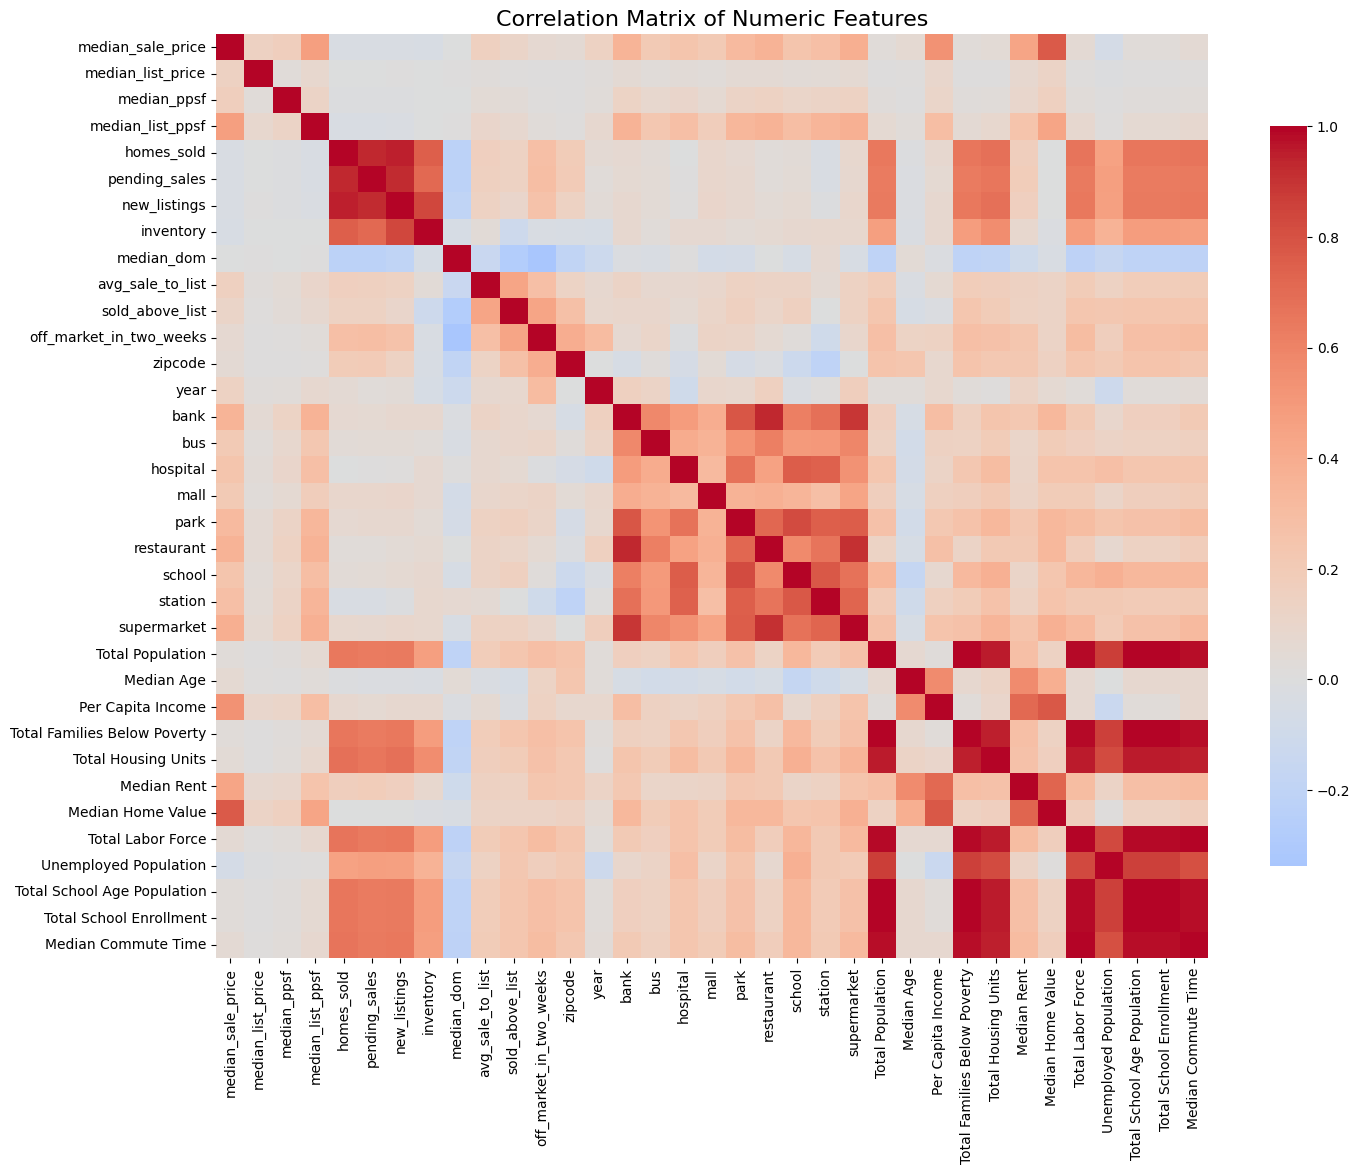

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include = ["float64", "int64"]).drop(columns = ["price"], errors = "ignore")

corr_matrix = numeric_cols.corr()

plt.figure(figsize=(16,12))

sns.heatmap(corr_matrix,
cmap = "coolwarm", 
center = 0,
annot = False, 
cbar_kws = {"shrink": 0.8})
plt.title("Correlation Matrix of Numeric Features", fontsize=16)
plt.show()

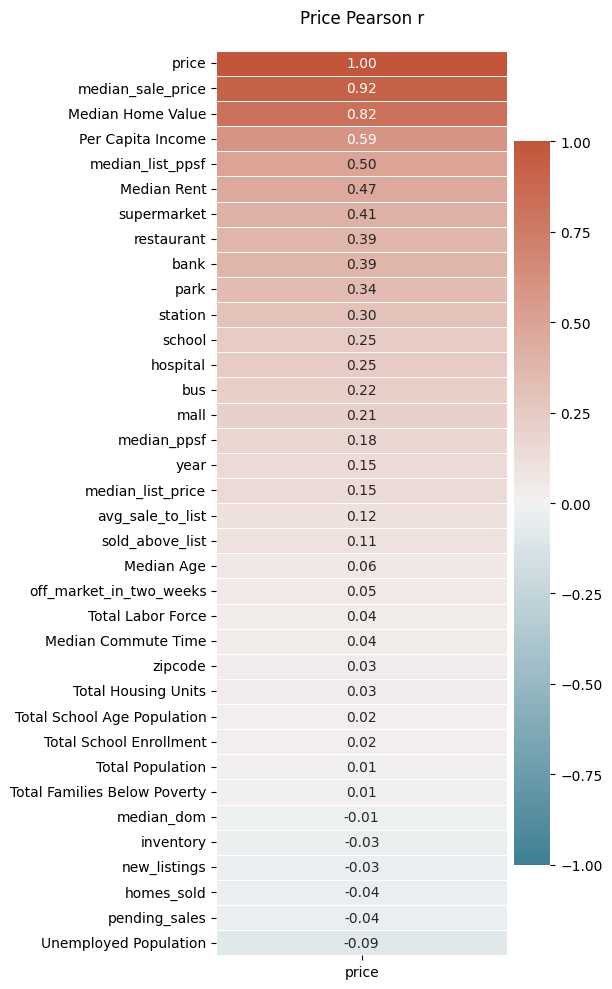

In [83]:
# Compute correlation with price 
num_cols = df.select_dtypes(include = ["int64", "float64"]).columns
corr_vec = df[num_cols].corr(method = "pearson")["price"].sort_values(ascending = False) 
plt.figure(figsize=(6,10))       
ax = sns.heatmap(
        corr_vec.to_frame(),     
        annot=True, fmt=".2f",
        vmin=-1, vmax=1,         
        cmap=sns.diverging_palette(220, 20, as_cmap=True),
        center=0,
        linewidths=.5, linecolor="white",
        cbar_kws={"shrink":0.8, "pad":0.02}
     )
ax.set_title("Price Pearson r", pad=20)
ax.set_ylabel("")                 
ax.set_xlabel("")
plt.tight_layout()
plt.show()